## Importação do Dataset

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
def incluir_titulo(dataframe):
    dataframe.columns = ['ano', 'uf', 'cidade', 'codigo', 'fator', 'sexo', 'idade', 'formacao', 'qtd']

In [109]:
df_2002 = pd.read_csv('perfil_eleitorado_2002.txt', encoding='cp1252', sep=';' )
df_2006 = pd.read_csv('perfil_eleitorado_2006.txt', encoding='cp1252', sep=';' )
df_2010 = pd.read_csv('perfil_eleitorado_2010.txt', encoding='cp1252', sep=';' )
df_2014 = pd.read_csv('perfil_eleitorado_2014.txt', encoding='cp1252', sep=';' )
df_2018 = pd.read_csv('perfil_eleitorado_ATUAL.txt', encoding='cp1252', sep=';' )

In [127]:
incluir_titulo(df_2002)
incluir_titulo(df_2006)
incluir_titulo(df_2010)
incluir_titulo(df_2014)
incluir_titulo(df_2018)

In [115]:
df_2014['ano'] = '2014'
df_2018['ano'] = '2018'

In [117]:
df = df_2002.append(df_2006)

In [118]:
df = df.append(df_2010)

In [119]:
df = df.append(df_2014)

In [120]:
df = df.append(df_2018)

In [121]:
df.groupby(['ano']).sum()['qtd']

ano
2002    115254108
2006    125913493
2010    135804431
2014    142822045
2018    147302340
Name: qtd, dtype: int64

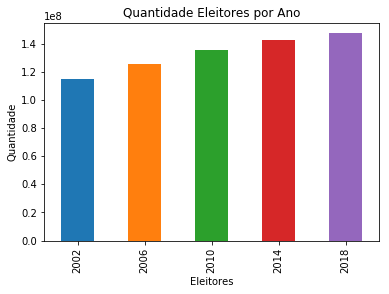

In [135]:
hist_eleitorado_ano = df.groupby(['ano']).sum()['qtd'].plot.bar(title="Quantidade Eleitores por Ano")
hist_eleitorado_ano.set_ylabel('Quantidade')
hist_eleitorado_ano.set_xlabel('Eleitores');

In [141]:
df_2014.groupby(['formacao']).sum()['qtd']

formacao
ANALFABETO                        7389545
ENSINO FUNDAMENTAL COMPLETO      10300652
ENSINO FUNDAMENTAL INCOMPLETO    43149597
ENSINO MÉDIO COMPLETO            23839328
ENSINO MÉDIO INCOMPLETO          27510992
LÊ E ESCREVE                     17252115
NÃO INFORMADO                      115472
SUPERIOR COMPLETO                 8038891
SUPERIOR INCOMPLETO               5225453
Name: qtd, dtype: int64

In [142]:
df_2018.groupby(['formacao']).sum()['qtd']

formacao
ANALFABETO                        6574110
ENSINO FUNDAMENTAL COMPLETO      10030145
ENSINO FUNDAMENTAL INCOMPLETO    38063881
ENSINO MÉDIO COMPLETO            33676847
ENSINO MÉDIO INCOMPLETO          24864060
LÊ E ESCREVE                     13147191
NÃO INFORMADO                       56359
SUPERIOR COMPLETO                13576120
SUPERIOR INCOMPLETO               7313627
Name: qtd, dtype: int64

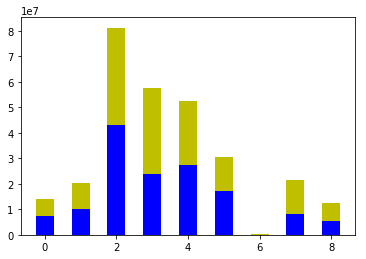

In [144]:
# Array com os não-sobreviventes, divididos em male e female
bar_1 = df_2014.groupby(['formacao']).sum()['qtd']

# Array com os sobreviventes, divididos em male e female
bar_2 = df_2018.groupby(['formacao']).sum()['qtd']

# Range com a quantidade de itens das barras
x_pos = np.arange(len(bar_1))

first_bar = plt.bar(x_pos, bar_1, 0.5, color='b')
second_bar = plt.bar(x_pos, bar_2, 0.5, color='y', bottom=bar_1)

# Definir posição e labels no eixo X
#plt.xticks(x_pos+0.25, ('Female','Male'))

plt.show()

## Correção de Caracteres Inválidos 

In [84]:
df.replace("Nï¿½O INFORMADO","NÃO INFORMADO", inplace=True)

In [85]:
df.replace("ENSINO Mï¿½DIO COMPLETO","ENSINO MÉDIO COMPLETO", inplace=True)

In [86]:
df.replace("ENSINO Mï¿½DIO INCOMPLETO","ENSINO MÉDIO INCOMPLETO", inplace=True)

In [87]:
df.replace("Lï¿½ E ESCREVE","LÊ E ESCREVE", inplace=True)

In [88]:
df.groupby(['formacao']).sum()['qtd']

formacao
ANALFABETO                        6574110
ENSINO FUNDAMENTAL COMPLETO      10030145
ENSINO FUNDAMENTAL INCOMPLETO    38063881
ENSINO MÉDIO COMPLETO            33676847
ENSINO MÉDIO INCOMPLETO          24864060
LÊ E ESCREVE                     13147191
NÃO INFORMADO                       56359
SUPERIOR COMPLETO                13576120
SUPERIOR INCOMPLETO               7313627
Name: qtd, dtype: int64

## Geração de Gráficos

Text(0.5,0,'Quantidade')

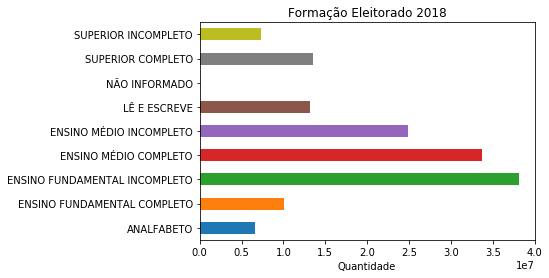

In [89]:
hist = df.groupby(['formacao']).sum()['qtd'].plot.barh(title="Formação Eleitorado 2018")
hist.set_ylabel('')
hist.set_xlabel('Quantidade')